<a href="https://colab.research.google.com/github/leoleeiamai/ai-finance-portfolio/blob/main/FTSE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install yfinance pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('seaborn-v0_8')

# Pick 5 FTSE tickers
tickers = ["HSBA.L", "BP.L", "VOD.L", "AZN.L", "LLOY.L"]

# Download adjusted close prices
df = yf.download(tickers, start="2018-01-01", auto_adjust=True)['Close']
df.tail()

print(df.shape)
df.head()


[*********************100%***********************]  5 of 5 completed

(1970, 5)


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2018-01-02,5094.078613,515.293518,762.003113,67.475983,232.580841
2018-01-03,5154.948242,521.964966,760.310120,67.246750,232.232651
2018-01-04,5159.937988,527.740295,762.999207,67.834793,234.073029
2018-01-05,5192.866699,527.341919,760.409790,67.844749,235.565216
2018-01-08,5141.976074,525.151428,754.931763,67.834793,236.410736


In [2]:
# Daily returns
returns = df.pct_change().dropna()

# Rolling mean (20-day) & rolling volatility (20-day)
rolling_mean = df.rolling(window=20).mean()
rolling_vol = returns.rolling(window=20).std() * np.sqrt(252)  # annualized vol

returns.head()


/tmp/ipython-input-3892339918.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2018-01-03,0.011949,0.012947,-0.002222,-0.003397,-0.001497
2018-01-04,0.000968,0.011065,0.003537,0.008745,0.007925
2018-01-05,0.006382,-0.000755,-0.003394,0.000147,0.006375
2018-01-08,-0.009800,-0.004154,-0.007204,-0.000147,0.003589
2018-01-09,0.002135,0.001138,0.010950,0.004996,0.001473


In [3]:
def max_drawdown(series):
    cum = (1 + series).cumprod()
    peak = cum.cummax()
    dd = (cum / peak) - 1
    return dd.min()

for t in tickers:
    dd = max_drawdown(returns[t])
    print(f"{t} Max Drawdown: {dd:.2%}")


HSBA.L Max Drawdown: -64.36%
BP.L Max Drawdown: -67.63%
VOD.L Max Drawdown: -73.43%
AZN.L Max Drawdown: -27.17%
LLOY.L Max Drawdown: -66.72%


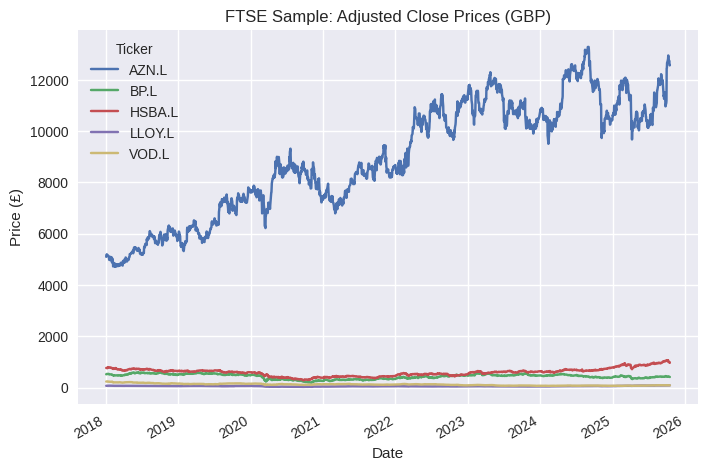

In [4]:
#Price series
df.plot(title='FTSE Sample: Adjusted Close Prices (GBP)')
plt.ylabel('Price (£)')
plt.show()


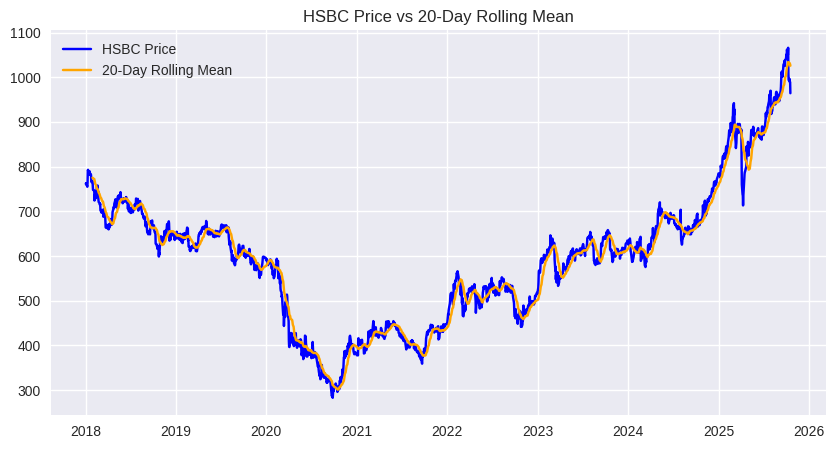

In [5]:
#Rolling Mean vs Actual (Example – HSBC)
plt.figure(figsize=(10,5))
plt.plot(df['HSBA.L'], label='HSBC Price', color='blue')
plt.plot(rolling_mean['HSBA.L'], label='20-Day Rolling Mean', color='orange')
plt.title('HSBC Price vs 20-Day Rolling Mean')
plt.legend()
plt.show()


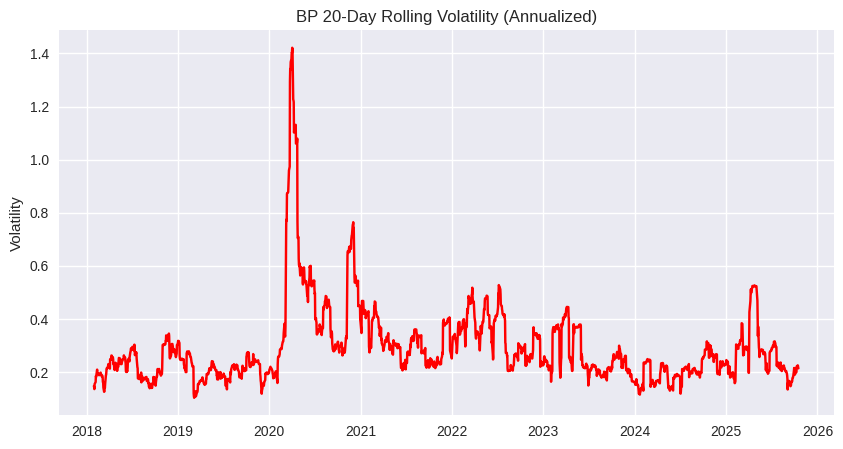

In [6]:
#Rolling Volatility (Example – BP)

plt.figure(figsize=(10,5))
plt.plot(rolling_vol['BP.L'], color='red')
plt.title('BP 20-Day Rolling Volatility (Annualized)')
plt.ylabel('Volatility')
plt.show()


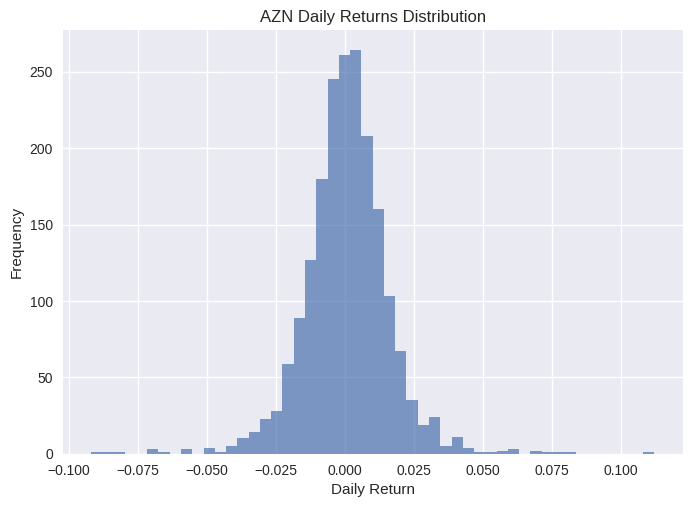

In [7]:
#Histogram of Returns (Example – AZN)

returns['AZN.L'].hist(bins=50, alpha=0.7)
plt.title('AZN Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Step 6 — Basic Summary Table

summary = pd.DataFrame({
    'Annual Return (%)': returns.mean() * 252 * 100,
    'Annual Volatility (%)': returns.std() * np.sqrt(252) * 100,
    'Max Drawdown (%)': [max_drawdown(returns[t]) * 100 for t in tickers]
}).round(2)

summary


,Annual Return (%),Annual Volatility (%),Max Drawdown (%)
Ticker,,,
AZN.L,14.56,24.54,-64.36
BP.L,2.43,32.60,-67.63
HSBA.L,6.37,25.90,-73.43
LLOY.L,7.31,30.80,-27.17
VOD.L,-8.92,27.06,-66.72


In [9]:
returns.corr().style.background_gradient(cmap='coolwarm')

Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Ticker,,,,,
AZN.L,1.000000,0.180889,0.204207,0.092166,0.226998
BP.L,0.180889,1.000000,0.463295,0.442798,0.331472
HSBA.L,0.204207,0.463295,1.000000,0.577368,0.348521
LLOY.L,0.092166,0.442798,0.577368,1.000000,0.339098
VOD.L,0.226998,0.331472,0.348521,0.339098,1.000000


In [10]:
df.resample('M').last()

/tmp/ipython-input-3013020464.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').last()


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2018-01-31,4876.046387,498.963593,748.059875,69.279991,223.428833
2018-02-28,4766.104004,473.195587,714.338562,68.572357,202.687531
2018-03-31,4886.378418,477.278687,662.837646,64.446045,193.207260
2018-04-30,5093.492676,535.787109,722.606750,64.465599,210.496597
2018-05-31,5455.815918,574.004333,717.898438,63.019951,190.819717
...,...,...,...,...,...
2025-06-30,10119.297852,365.645874,881.732056,76.688103,77.779999
2025-07-31,11323.213867,404.690063,922.728943,77.800003,82.019997
2025-08-31,11790.000000,432.100006,946.700012,79.519997,88.360001
